In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Содержание<a name="0"></a>

1. [Введение](#1)
2. [Задачи и подходы кластеризации](#2)
3. [Условия задач кластеризации](#3)
4. [Алгоритмы кластеризации](#4)
5. [K-means. Практика](#5)
6. [EM-алгоритм. Практика](#6)
7. [Агломеративная кластеризация. Практика](#7)
8. [DBSCAN. Практика](#8)
9. [Сравнение алгоритмов](#9)
10. [Оценка качества](#10)
11. [Коэффициент силуэта. Практика](#11)
12. [Однородность. Практика](#12)
13. [Полнота. Практика](#13)
14. [V-мера. Практика](#14)

---

# Введение<a name="1"></a>

<b><span style="color:green">Кластеризация</span></b> — это задача разбиения некого количества объектов на группы (кластеры), при этом объекты в группах должны иметь что-то общее и сильно отличаться от объектов в других кластерах. Перечень групп определяется в процессе работы алгоритма, а не заранее. Задача кластеризации является задачей обучения без учителя.  

По сути, кластеризация очень похожа на задачу классификации, но без известных заранее классов. Алгоритм самостоятельно находит близкие по каким-то признакам точки и объединяет их в кластеры. Подобную операцию вы можете наблюдать, если будете искать какие-то часто встречающиеся объекты на карте.  

Предположим, вы хотите арендовать квартиру и ищете подходящие варианты по заданным вами параметрам.  

Если вы будете рассматривать карту вблизи, то точки-квартиры будут стоять на домах по отдельности:

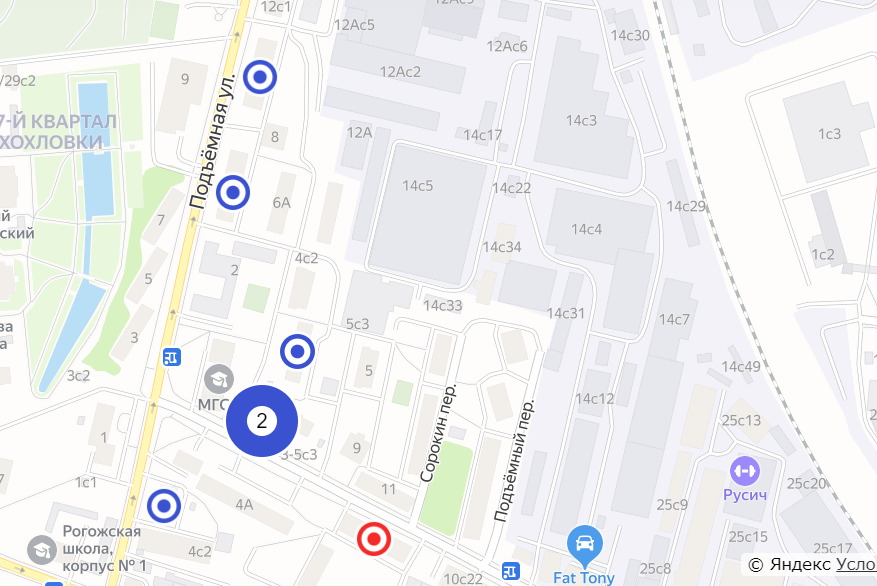

Если же вы отдалите карту, то квартиры соединятся в кластеры по географической близости:

C помощью кластеризации можно решать следующие задачи:

* сегментация рынка;
* объединение близких точек на карте;
* сжатие изображений;
* детекторы аномального поведения;
* выделение схожих групп респондентов на основании соцопросов;
* формирование поведенческих паттернов людей;
* выделение схожих по экономическим показателям регионов;
* сегментация изображений для выделения объектов.

[К содержанию](#0)

---

# Задачи и подходы кластеризации<a name="2"></a>

<b><span style="color:green">Задача кластеризации:</span></b> найти отображение множества входных объектов $X$, которое разделило бы множество $X$ на подгруппы. Кластеризация — это обучение <b><span style="color:green">без учителя</span></b>.  

Формальная запись задачи кластеризации выглядит следующим образом:  

Пусть $X$ — множество объектов, $Y$ — множество <b><span style="color:green">метод кластеров</span></b> (идентификаторов их принадлежности). На множестве $X$ задана функция, которая вычисляет расстояние между объектами:

$$\rho\left(x, x^{\prime}\right)$$

Также дана конечная обучающая выборка объектов:

$$X^{m}=\left\{x_{1}, \ldots, x_{m}\right\} \subset X$$

Нам надо разбить выборку на кластеры, то есть поставить каждому объекту $x_{i} \in X^{m}$ в соответствие метку $y_{i} \in Y$ так, чтобы внутри каждого кластера объекты были <b><span style="color:green">как можно более близки</span></b> (то есть расстояние должно быть минимальным), а объекты из разных кластеров значительно различались.

В задаче кластеризации входные данные задаются двумя способами:

* Признаковое описание объектов: все объекты описываются некоторыми характеристиками (значениями признаков)
* Матрица расстояний между объектами: для каждого объекта представлены расстояния от него до всех остальных объектов выборки

<b><span style="color:green">Некорректность задачи кластеризации</span></b> — решение задачи кластеризации принципиально неоднозначно:

* Нет <b><span style="color:green">точной постановки</span></b> задачи кластеризации.
* Существует <b><span style="color:green">множество критериев</span></b> качества кластеризации.
* Существует <b><span style="color:green">множество методов</span></b> кластеризации.
* Часто заранее <b><span style="color:green">неизвестно число</span></b> кластеров.
* Результат кластеризации зависит от метрики, которая задаётся <b><span style="color:green">субъективно</span></b>.

<b><span style="color:green">Для чего нужны разные подходы кластеризации?</span></b>

1. <b><span style="color:green">Разные цели кластеризации:</span></b>
    * Упростить дальнейшую обработку данных: разбить множество объектов на несколько групп (кластеров), чтобы в дальнейшем работать с каждым кластером в отдельности  
    
    * Сократить объём хранимых данных: выделить кластеры и оставить по одному объекту от каждого кластера и таким образом сжать данные  
    
    * Выделить нетипичные объекты: выделить объекты, которые нельзя отнести ни к одному из кластеров  
    
    * Построить иерархию множества объектов: задача таксономии.  
    
    
2. <b><span style="color:green">Разнообразие условий задач кластеризации.</span></b>

[К содержанию](#0)

---

# Условия задач кластеризации<a name="3"></a>

* <b><span style="color:green">Форма кластеров:</span></b> внутрикластерные расстояния меньше межкластерных, ленточная структура, кластеры с центром, кластеры соединены перемычками, разреженный фон, пересекающиеся кластеры, кластеры отсутствуют, кластеры образуются не по близости расстояний.

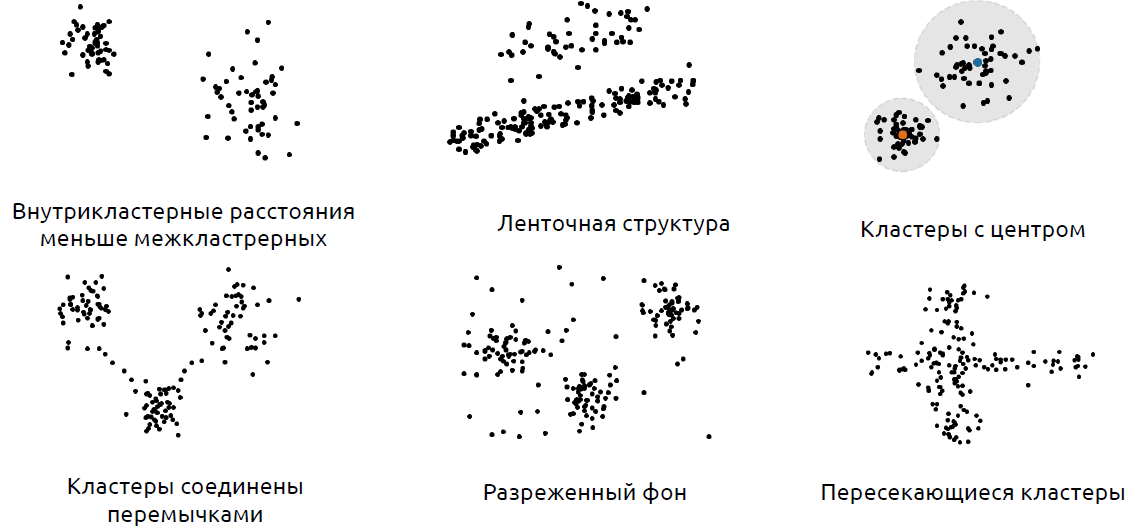

* <b><span style="color:green">Вложенность кластеров друг в друга.</span></b>

* <b><span style="color:green">Размер кластеров:</span></b> один кластер — одна тема, один кластер — одно большое событие, один кластер — одна новость.

* <b><span style="color:green">Кластеризация как основная или вспомогательная задача.</span></b>

* <b><span style="color:green">Жёсткая</span></b> (определяем конкретный кластер для объекта) или <b><span style="color:green">мягкая</span></b> (определяем вероятность принадлежности объекта к кластеру) <b><span style="color:green">кластеризация</span></b>.

[К содержанию](#0)

---

# Алгоритмы кластеризации<a name="4"></a>

Рассмотрим четыре основных алгоритма кластеризации:

* k-means;
* EM-алгоритм;
* DBSCAN;
* агломеративная кластеризация.

### <span style="color:green">K-MEANS

<b><span style="color:green">k-means</span></b> является одним из самых популярных и простых алгоритмов кластеризации. В ходе этого алгоритма все элементы пространства разбиваются на заранее известное (заданное) количество кластеров. Суть алгоритма состоит в том, что он пытается оптимизировать расстояние всех точек кластера от центра этого кластера. То есть он формирует кластеры так, чтобы внутри каждого сумма квадратов расстояний от точек до центра кластера была как можно меньше.

><b><span style="color:green">Схема действия алгоритма k-means</span></b>
>
>1. Выбрать количество кластеров, которое нам кажется оптимальным для наших данных.
>2. Выбрать случайным образом в пространство наших данных центроиды.
>3. Для каждой точки набора данных посчитать, к какому центроиду она ближе.
>4. Переместить каждый центроид в центр выборки, которую мы отнесли к этому центроиду. Каждый центроид на каждой итерации — вектор, элементы которого представляют собой средние значения признаков, вычисленные по всем записям кластера.
>5. Повторять шаги 3-4 фиксированное число раз или до тех пор, пока центроиды не сойдутся.

Итерации алгоритма выглядят визуально следующим образом:

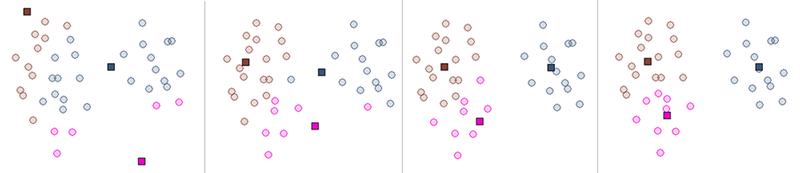

У этого алгоритма есть ряд недостатков:  

* число кластеров надо знать заранее;
* алгоритм очень чувствителен к первичному выбору центроидов;
* не гарантирует достижение глобального минимума суммы квадратов расстояний, часто «застревает» в локальном минимуме.  

У данного алгоритма есть также вариации, которые применяются в некоторых специфических случаях. Рассмотрим их ниже.

### <span style="color:green">Mini-Batch K-means

Данная вариация *k-means* используется в случае, если данных очень много. Из-за объема данных вычисление центров по всей выборке происходит долго. Решение проблемы: на каждом шаге *k-means* работать с небольшой <b><span style="color:green">подвыборкой данных</span></b>. В общем случае упрощённый алгоритм должен сходиться к тому же результату, что и на полной выборке. Однако исследования показывают, что качество кластеров может ухудшаться по сравнению с классическим *k-means*.

### <span style="color:green">K-means++

Ещё одну вариацию алгоритма *k-means* мы используем в том случае, если у нас очень много признаков. Как известно, результат и время работы *k-means* зависит от изначального выбора центров. Чтобы минимизировать затраты, мы будем действовать следующим образом:

* Первый центр выбираем случайно из равномерного распределения на выборке.
* Каждый следующий центр выбираем случайно из оставшихся точек так, чтобы вероятность выбрать каждую точку была пропорциональна квадрату расстояния от неё до ближайшего центра.

### <span style="color:green">EM-АЛГОРИТМ

Следующий алгоритм кластеризации — *EM*-алгоритм. Последовательность действий в нём выглядит следующим образом:

><b><span style="color:green">Схема действий EM-алгоритма</span></b>
>
>1. Выбрать количество кластеров, которое нам кажется <b><span style="color:green">оптимальным</span></b> для наших данных.
>2. Выбрать случайным образом в пространство наших данных <b><span style="color:green">параметры распределений</span></b>.
>3. Для каждой точки нашего набора данных посчитать <b><span style="color:green">вероятность принадлежности</span></b> к каждому кластеру.
>4. Обновить параметры распределений таким образом, чтобы <b><span style="color:green">максимизировать</span></b> вероятность принадлежности точек, отнесённых к кластеру.
>5. Повторять шаги 3-4 фиксированное число раз, либо до тех пор пока центроиды не сойдутся.

### ПРИМЕР

<b><span style="color:green">Дано:</span></b>

* k кластеров.
* Априорные вероятности кластеров: $w_1, ......, w_k$
* Плотности распределения кластеров: $p_1(x), ......, p_k(x)$

<b><span style="color:green">Определить:</span></b>

Плотность распределения признаков объекта $x$: $p(x)=\sum_{j=1}^{k}w_jp_j(x)$

<b><span style="color:green">Результат:</span></b>

Получим вероятность принадлежности объекта к кластеру.  
$p(x)=\sum_{j=1}^{k}w_jp_j(x)$  
$p_j(x)=\phi_j(\theta _j;x)$

<b><span style="color:green">E-шаг (expectation)</span></b> — вычисляем ожидаемый кластер для каждого объекта:  
$g_{ji}=p(j|x_i)=\frac{w_jp_j(x_i)}{p(x_i)}$

<b><span style="color:green">M-шаг (maximization)</span></b> — оцениваем вес и параметры распределения для каждого кластера:  
$w_j=\frac{1}{N}\sum_{i-1}^{N}g_ji$  
$\theta_j=argmax_\theta\sum_{i-1}^{N}g_{ji}ln\phi(\theta;x)$

Выбираем <b><span style="color:green">«скрытые переменные»</span></b>, чтобы с их помощью максимизировать правдоподобие. E-шаг (expectation) — оцениваем скрытые переменные. M-шаг (maximization) – оцениваем $w_1, ......, w_k$ и $p_1(x), ......, p_k(x)$, фиксируем скрытые переменные.

Можно выделить следующие преимущества алгоритма:

* Эффективная обработка больших объемов данных (Big Data).
* Мощная статистическая основа.
* Устойчивость к шумам и пропускам в данных.
* Возможность построения желаемого числа кластеров.
* Быстрая сходимость при удачной инициализации.  

Недостатки алгоритма следующие:

* При неудачной инициализации сходимость алгоритма может оказаться медленной.
* Предположение о нормальности всех измерений данных не всегда выполняется.
* Алгоритм иногда останавливается в локальном минимуме и не достигает глобального.

### <span style="color:green">АГЛОМЕРАТИВНАЯ КЛАСТЕРИЗАЦИЯ

<b><span style="color:green">Иерархическая</span></b> кластеризация делится на две стратегии: <b><span style="color:green">агломеративная</span></b> — снизу-вверх, объединяем точки в кластеры и <b><span style="color:green">дивизионная</span></b> — сверху-вниз, разделяем один большой кластер на малые.

1. Назначаем каждой точке свой кластер.
2. Сортируем попарные расстояния между центрами кластеров по возрастанию.
3. Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера.
4. Повторяем шаги 2-3 до тех пор, пока все данные не склеятся в один кластер.  

Визуально это выглядит следующим образом:

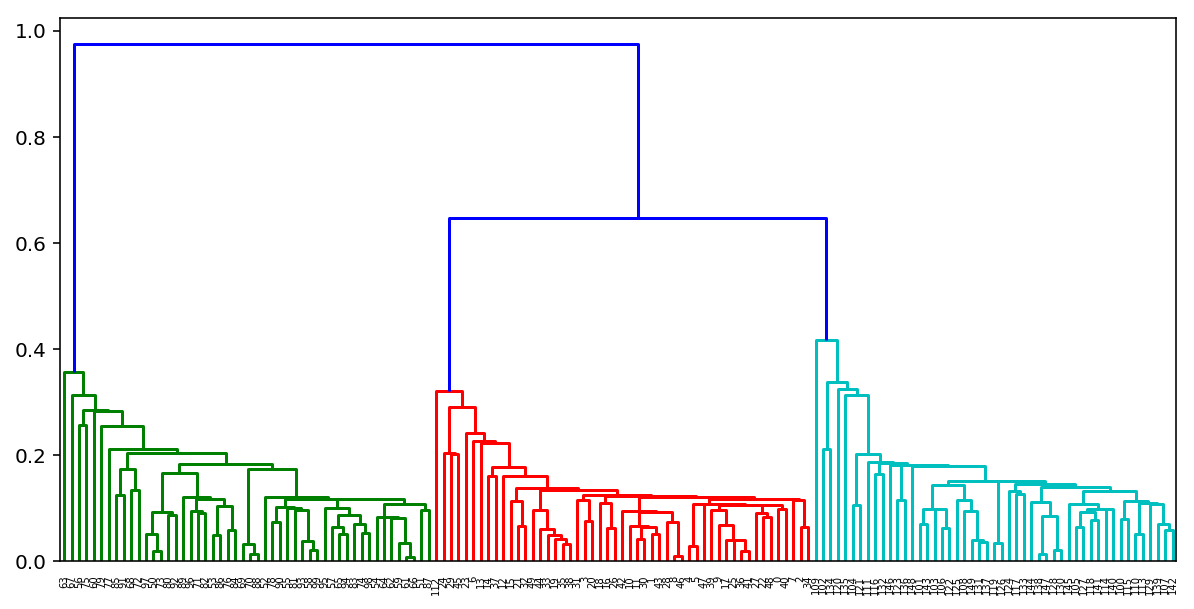

<b><span style="color:green">Расстояние между кластерами:</span></b>

__Поиск__ ближайших кластеров можно осуществлять с помощью разных методов объединения точек:

* Расстояние ближнего соседа.  
$$\begin{equation}d\left(C_{i}, C_{j}\right)=\min _{x_{i} \in C_{i}, x_{j} \in C_{j}}\left\|x_{i}-x_{j}\right\|\end{equation}$$
* Расстояние дальнего соседа.  
$$\begin{equation}d\left(C_{i}, C_{j}\right)=\max _{x_{i} \in C_{i}, x_{j} \in C_{j}}\left\|x_{i}-x_{j}\right\|\end{equation}$$
* Групповое среднее расстояние.  
$$\begin{equation}d\left(C_{i}, C_{j}\right)=\frac{1}{n_{i} n_{j}} \sum_{x_{i} \in C_{i}} \sum_{x_{j} \in C_{j}}\left\|x_{i}-x_{j}\right\|\end{equation}$$
* Расстояние между центрами.
$$\begin{equation}d\left(C_{i}, C_{j}\right)=\left\|\mu_{i}-\mu_{j}\right\|\end{equation}$$

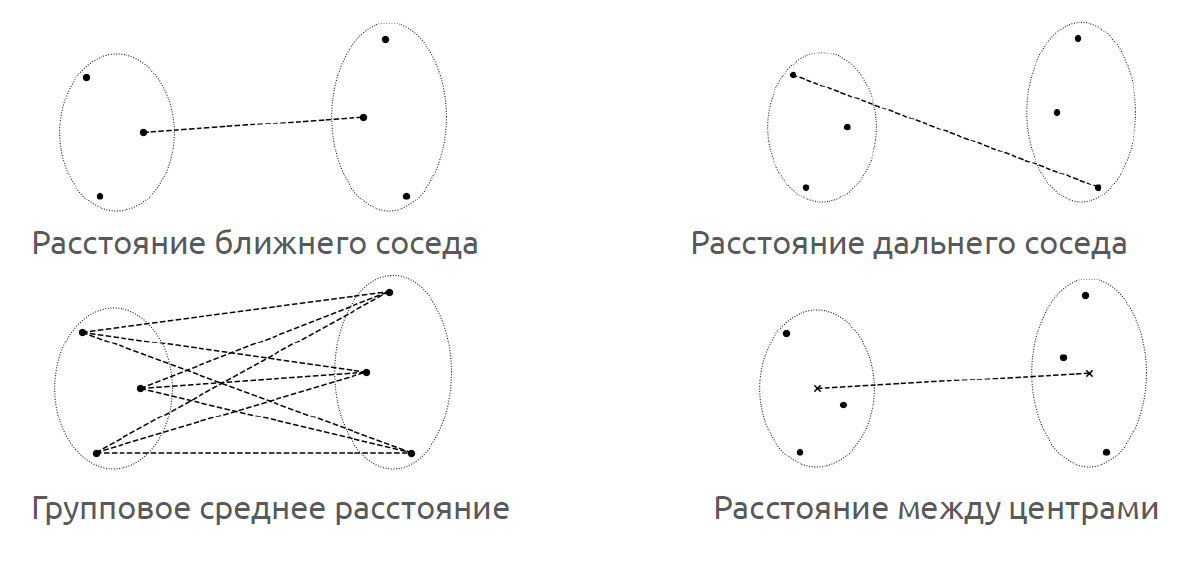

<b><span style="color:green">Формула Ланса-Уильямса:</span></b>

$$\begin{equation}R(U \cup V, S)=\alpha_{U} R(U, S)+\alpha_{V} R(V, S)+\beta R(V, S)+\gamma|R(U, S)-R(V, S)|\end{equation}$$

<b><span style="color:green">Расстояние Уорда:</span></b>

$$\begin{equation}\begin{array}{l} R^{w}(W, S)=\frac{|S||W|}{|S|+|W|} \rho^{2}\left(\sum_{w \in W} \frac{w}{|W|}, \sum_{s \in S} \frac{s}{|S|}\right) \\ \alpha_{U}=\frac{|S|+|U|}{|S|+|W|}, \alpha_{V}=\frac{|S|+|V|}{|S|+|W|}, \beta=\frac{-|S|}{|S|+|W|}, \gamma=0 \end{array}\end{equation}$$

### <span style="color:green">DBSCAN

Расшифровывается как *Dense-based spatial clustering of applications with noise*. Это основанная на плотности <b><span style="color:green">пространственная кластеризация</span></b> для приложений с шумами.

<b><span style="color:green">Схема действия DBSCAN</span></b>

1. Случайно выбираем точку, которую не посещали. Окрестность точки извлекается с использованием расстояния .
2. Если в этой окрестности точек ≥ <b><span style="color:green">minPoints</span></b>, тогда точка становится первой точкой в новом кластере. Иначе — помечаем точку как <b><span style="color:green">шум</span></b>, она становится посещённой.
3. Точки из окрестности становятся частью кластера. Для каждой из них изучаем <b><span style="color:green">окрестность</span></b>: если точек в окрестности < <b><span style="color:green">minPoints</span></b>, то помечаем точку как граничную.
4. Повторяем пункты 2 и 3, пока не определим все точки в кластере.
5. Повторяем пункты 1–4, пока все точки не станут просмотренными.

<b><span style="color:green">Главная идея:</span></b>  

* Основные точки.
* Граничные точки.
* Шумовые точки.  

Достоинства алгоритма:

* не требуется число кластеров;
* определяем кластеры произвольной формы;
* определяет шум, устойчив к выбросам.  

Недостатки алгоритма:

* не может выделять кластеры, имеющие разную плотность;
* результат зависит от используемой функции расстояния.

[К содержанию](#0)

---

# K-means. Практика<a name="5"></a>

In [3]:
from itertools import cycle, islice

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [4]:
plt.rcParams['figure.figsize'] = 12, 8

In [5]:
np.random.seed(0)

# Количество объектов в каждом датасете
n_samples = 1500

# Вписанные круги
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
# Оставляем только признаки датасета, так как для кластеризации нам не нужны истинные классы объектов
X, y = noisy_circles
noisy_circles = X

# Полукруги
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
X, y = noisy_moons
noisy_moons = X

# Кластеры в форме круга
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
X, y = blobs
blobs = X

# Отсутствие кластерной структуры
no_structure = np.random.rand(n_samples, 2)

# Кластеры лентовидной формы
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = X_aniso

# Кластеры в форме кругов с различной дисперсией
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)
X, y = varied
varied = X

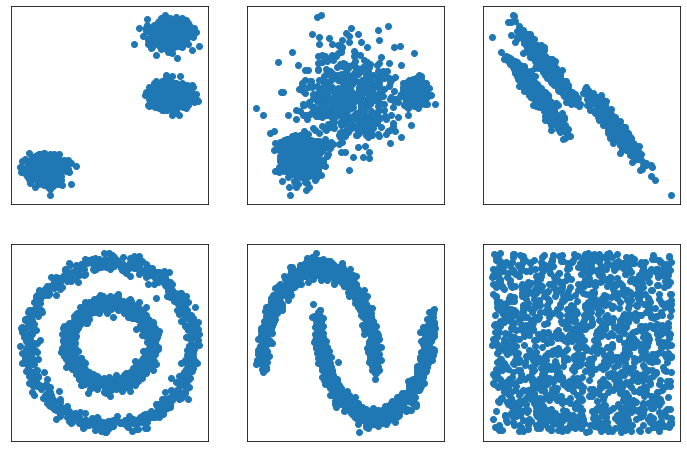

In [6]:
# Визуализируем кластеры
datasets_list = [blobs, varied, aniso, noisy_circles, noisy_moons, no_structure]
for i, X in enumerate(datasets_list, start=1):
    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    plt.scatter(X[:, 0], X[:, 1])

## KMeans

Интерактивная визуализация работы KMeans – https://www.naftaliharris.com/blog/visualizing-k-means-clustering/

Для примера из видео: **Random** $\rightarrow$ **Packed Circles**

![KMeans](https://www.jeremyjordan.me/content/images/2016/12/kmeans.gif "KMeans")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

Рассмотрим, с какими <b><span style="color:green">наборами данных</span></b> будут работать наши алгоритмы. Первый набор данных — три хорошо разделимых кластера, второй — три кластера с добавлением шума, далее — кластеры с ленточной структурой. В нижнем ряду сложные случаи, когда кластеры вписываются друг в друга или не имеют структуру.

Посмотрим, как организован алгоритм K-means в <b><span style="color:green">библиотеке Sklearn</span></b>. Импортируем данные, при инциализации можем указать ожидаемое число кластеров, способ инициализации центроид, максимальное число интераций.

In [7]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, 
                 init='k-means++', # 'k-means++', 'random', numpy.array
                 max_iter=300
                )

Как же будет работать алгоритм на наших данных? Вызываем <b><span style="color:green">метод k_means.fit()</span></b>, который будет обучаться на нашем наборе данных. Далее строим графики для каждого из наших датасетов.

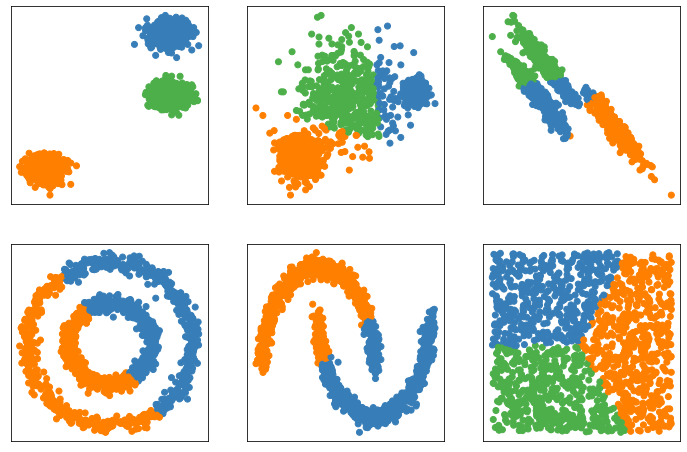

In [8]:
# создаём массив пар – датасета и соответствующих для него параметров алгоритма
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, k_means_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    k_means = KMeans(n_clusters=k_means_params['n_clusters'])
    
    k_means.fit(X)
    y_pred = k_means.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### ПОДГОТОВКА ДАТАСЕТА

Для наших задач создадим <b><span style="color:green">датасет</span></b>, в котором будет три кластера, а у каждого объекта будет два признака.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

<b><span style="color:green">Визуализируем наш датасет:

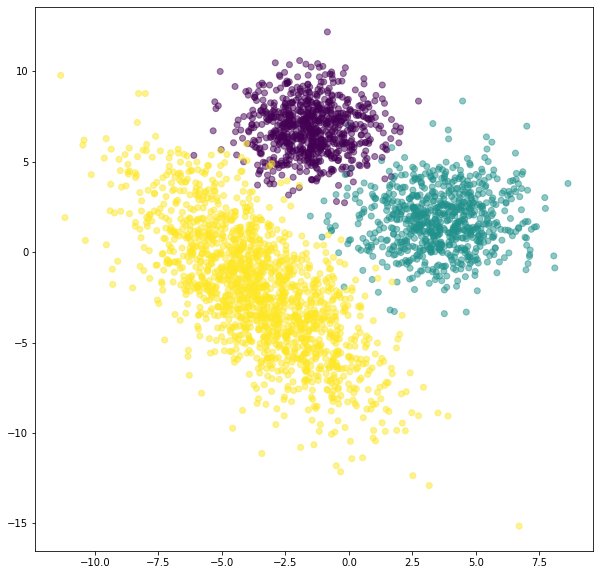

In [10]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

Посмотрим распределение классов в датасете:

In [11]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

В дальнейшем в задачах с использованием этого датасета при использовании переменных X и y считать, что эти переменные содержат признаки объектов и классы объектов датасета соответственно.

Объект, который выполняет кластеризацию датасета с помощью алгоритма K-means, инициализруется так:

In [12]:
from sklearn.cluster import KMeans
k_means = KMeans()

При создании объекта можно указать следующие параметры:

* <b><span style="color:green">n_clusters</span></b> — число кластеров, на которое алгоритм будет делить набор данных;
* <b><span style="color:green">init</span></b> — способ начальной инициализации центроидов кластров;
* <b><span style="color:green">random_state</span></b> — фиксирует генерацию случайного числа для инициализации центроидов.  

Полный список параметров доступен в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) (англ.).

### ЗАДАЧИ

Для обучения модели K-means необходимо вызвать метод fit, передав входным параметром признаки объектов датасета:

In [13]:
k_means.fit(X)

KMeans()

Обучив, мы можем получить центроиды кластеров:

In [14]:
k_means.cluster_centers_

array([[-1.90833635,  7.75425289],
       [-0.44569724, -7.31605189],
       [ 2.62862205,  0.71845893],
       [-4.51122415, -0.78499539],
       [-0.82952872,  5.52727328],
       [-2.54661563, -3.81495561],
       [-6.45859761,  3.04470729],
       [ 4.71837969,  2.61799646]])

И узнать, в какой кластер попал каждый из объектов:

In [15]:
k_means.labels_

array([7, 2, 0, ..., 3, 3, 1])

Обучите модель K-means с параметрами n_clusters=3 и random_state=42 на признаках исходного датасета.

__Какие центроиды будут у получившихся кластеров?__ Введите ответ в виде массива. Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией numpy.round.

In [16]:
k_means = KMeans(n_clusters=3, random_state=42)

In [17]:
k_means.fit(X)
centers = k_means.cluster_centers_
print(np.round(centers).astype(np.int))

[[-3 -3]
 [-2  6]
 [ 4  2]]


Подсчитайте количество элементов в каждом из получившихся кластеров. Запишите в форму ниже три числа через пробел(без запятых!): количество элементов в кластере 0, в кластере 1 и в кластере 2. Записывайте строго в таком порядке.

Для подсчёта элементов в списке можно воспользоваться функцией numpy.unique с параметром return_counts=True:

In [18]:
counts = np.unique(k_means.labels_, return_counts=True)
for count in counts[1]:
    print(count, end=' ')

1321 938 741 

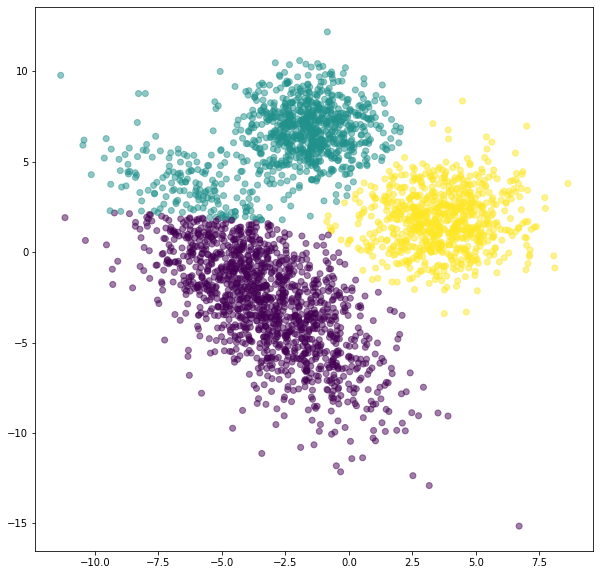

In [19]:
k_means_pred = k_means.labels_

plt.scatter(X[:, 0], X[:, 1], c=k_means_pred, alpha=0.5)
plt.show()

### ЗАДАЧА НА РЕАЛЬНЫХ ДАННЫХ: КЛАСТЕРИЗАЦИЯ УЧЕНИКОВ СТАРШЕЙ ШКОЛЫ

Подгрузите [данные](https://lms.skillfactory.ru/assets/courseware/v1/fc9a6b3836e87e600ca5ee7880dd264e/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/snsdata.csv) и откройте их.

В датасете для учеников предоставлены следующие признаки:

* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)  

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью <code>StandardScaler()</code>. Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод *k-means* для кластеризации, количество кластеров возьмите за 9, <code>random_state=123</code>.

In [20]:
stud_df = pd.read_csv('snsdata.csv')

In [21]:
stud_df = stud_df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)

In [22]:
scaler = StandardScaler()
stud_df[stud_df.columns] = scaler.fit_transform(stud_df[stud_df.columns].values)

In [23]:
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(stud_df)
stud_df['cluster_label'] = k_means.labels_

Укажите номер кластера, в который попало меньше всего учеников.

In [24]:
clasters, counts = np.unique(k_means.labels_, return_counts=True)
min_count = max(counts)
for claster, count in zip(clasters, counts):
    if count < min_count:
        min_claster = claster
        min_count = count
print (min_claster)

3


[К содержанию](#0)

---

# EM-алгоритм. Практика<a name="6"></a>

## EM-алгоритм

![EM-алгоритм](https://upload.wikimedia.org/wikipedia/commons/6/69/EM_Clustering_of_Old_Faithful_data.gif "EM-алгоритм")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

__Пример работы EM-алгоритма:__

* выбираем число кластеров, которое нам кажется оптимальным, в нашем случае их два;
* выбираем <b><span style="color:green">параметр распределений</span></b>;
* для каждой точки набора считаем <b><span style="color:green">вероятность</span></b> принадлежности каждому распределению;
* пересчитываем параметры распределения;
* повторяем шаги: снова присваиваем точку распределению и считаем параметры.  

Рассмотрим реализацию алгоритмы в библиотеке <b><span style="color:green">Sklearn</span></b>. Наш алгоритм лежит в пакете <b><span style="color:green">GaussianMixture</span></b>. При инициализации мы можем указать число компонентов, максимальное число итераций и способ инициализации начальных параметров.

In [25]:
from sklearn.mixture import GaussianMixture

em_gm = GaussianMixture(n_components=1, 
                        max_iter=100,
                        init_params='kmeans' # 'kmeans’, ‘random’
                       )

Посмотрим, как EM-алгоритм будет работать с нашим набором данных. Сделаем нормализацию признаков объектов, создадим объект, который будет кластеризовать, вызовем методы <b><span style="color:green">fit()</span></b> и <b><span style="color:green">predict()</span></b> и построим получившиеся кластеры для наших датасетов.

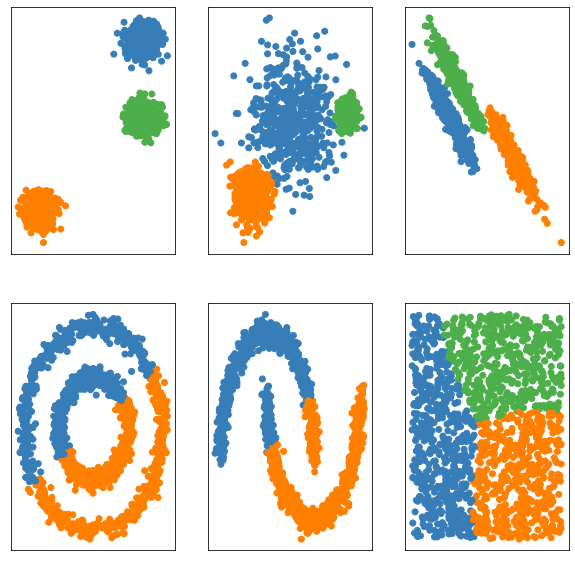

In [26]:
datasets_params_list = [
    (blobs, {'n_clusters': 3}),
    (varied, {'n_clusters': 3}),
    (aniso, {'n_clusters': 3}),
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (no_structure, {'n_clusters': 3})]

for i, (X, em_gm_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    em_gm = GaussianMixture(n_components=em_gm_params['n_clusters'])
    
    em_gm.fit(X)
    y_pred = em_gm.predict(X)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

### ПОДГОТОВКА ДАТАСЕТА

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

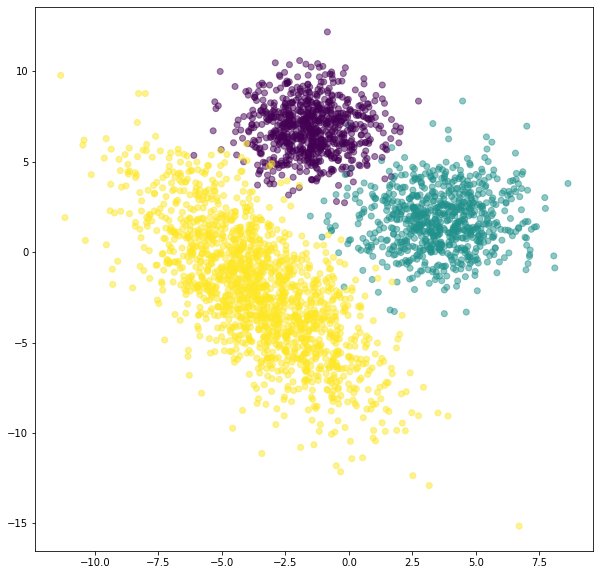

In [28]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [29]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Объект, который выполняет кластеризацию датасета с помощью EM-алгоритма, инициализируется так:

In [30]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture()

В отличие от остальных рассматриваемых алгоритмов, EM-алгоритм лежит не в модуле <b><span style="color:green">cluster</span></b>, а в модуле <b><span style="color:green">mixture</span></b>. EM-алгоритм определяет <b><span style="color:green">смеси распределений</span></b> в выборке, а не просто проводит кластеризацию.

Полный список параметров доступен в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (англ.).

Для обучения модели GaussianMixture необходимо вызвать <b><span style="color:green">метод fit</span></b>, передав входным параметром признаки объектов датасета:

In [31]:
gm.fit(X)

GaussianMixture()

Получить предсказания можно с помощью <b><span style="color:green">метода predict</span></b> после метода fit:

In [32]:
gm.fit(X)
y_pred = gm.predict(X)

Можно совместить эти два шага при помощи <b><span style="color:green">метода fit_predict</span></b>:

In [33]:
y_pred = gm.fit_predict(X)

Обучив, мы можем получить параметры распределений кластеров, например, средние:

In [34]:
means = gm.means_

### ЗАДАЧИ

Обучите **модель GaussianMixture** с параметрами <code>n_components=3</code> и <code>random_state=42</code> на признаках исходного датасета.

**Какие средние значения будут у получившихся распределений кластеров?** Каждое число в ответе округлите до ближайшего целого. Для округления можно воспользоваться функцией <code>numpy.round</code>:

In [35]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
means = gm.means_
print(np.round(means).astype(np.int))

[[-2 -4]
 [ 1  4]
 [-5  0]]


Подсчитайте количество элементов в каждом из получившихся кластеров. Выведите три числа через пробел: количество элементов в кластере 0, в кластере 1 и в кластере 2. Числа вводите целые, без точек и запятых.

Для подсчёта элементов в списке можно воспользоваться **функцией numpy.unique** с параметром return_counts=True:

In [36]:
y_pred = gm.predict(X)
_, counts = np.unique(y_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

788 1510 702 

Возьмите данные про учеников старшей школы и примените к ним EM-алгоритм , количество кластеров — 9, <code>random_state = 123</code>. К какому кластеру принадлежит восьмой (по списку из изначального датасета) ученик?

In [37]:
stud_df = pd.read_csv('snsdata.csv')
X = stud_df.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [38]:
gm = GaussianMixture(n_components=9, random_state=123)
gm.fit(X)
y_pred = gm.predict(X)

In [39]:
y_pred[7]

3

Сколько итераций до схождения осуществил алгоритм?

In [40]:
gm.n_iter_

30

[К содержанию](#0)

---

# Агломеративная кластеризация. Практика<a name="7"></a>

## Агломеративная кластеризация

![AG](https://media.giphy.com/media/pSNCWCEAsgrAs/giphy.gif "Агломеративная кластеризация")


Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

Будем поочередно объединять близлежащие объекты (кластеры), пока весь датасет не войдёт в кластеры. Посмотрим, как реализуется агломеративная кластеризация в пакете <b><span style="color:green">Sklearn</span></b>. При <b><span style="color:green">инициализации</span></b> можно задать количество кластеров, функцию расстояния, способ определения ближайшего соседа:

In [41]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean', # “euclidean”, “l1”, “l2”, “manhattan”, 
                                                   # “cosine”, or “precomputed”
                             linkage='ward', # “ward”, “complete”, “average”, “single”
                            )

Посмотрим, как агломеративная кластеризация будет работать с нашими наборами данных. Мы будем варьировать только <b><span style="color:green">число кластеров</span></b>. Будем также использовать <b><span style="color:green">матрицу смежности</span></b>, для которой нужен <b><span style="color:green">параметр n_neighbors</span></b>, то есть число ближайших соседей.

>**Примечание**. Матрица смежности — это матрица, которая соответствует графу, и которая отражает, с какими соседями объект соединен или нет. Например, на рисунке ниже объект а соединен с *е, f, b*, поэтому на пересечении  строки(столбца) а со столбцами (строками) *e, f, b* стоят единички.

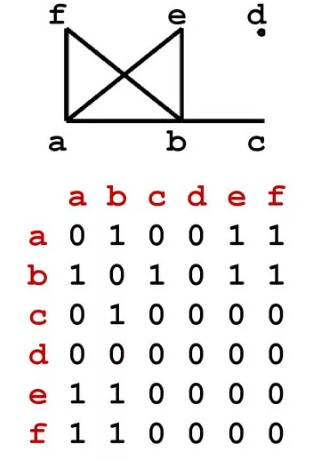

Вместо единичек, которые показывают, есть связь или нет, могут быть другие характеристики. Например, расстояние между объектами.

Мы используем здесь матрицу смежности по той причине,что агломеративная кластеризация строится в качестве одного из вариантов именно по такой матрице, которая показывает, сколько ближайших соседей находится рядом с объектом.

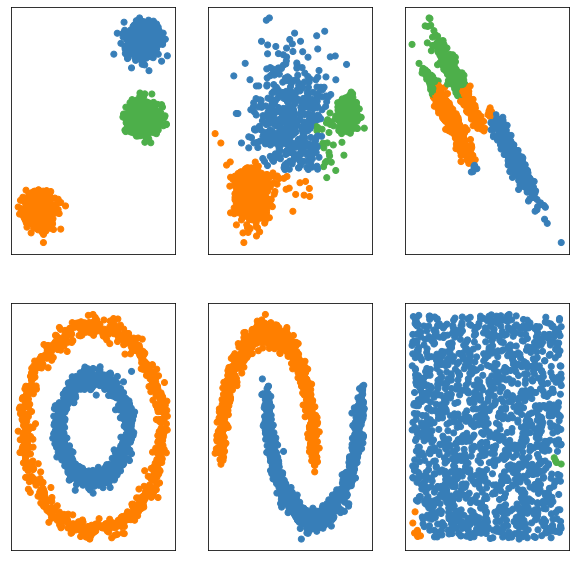

In [42]:
import warnings

from sklearn.neighbors import kneighbors_graph

datasets_params_list = [
    (blobs, {'n_clusters': 3, 'n_neighbors': 10}),
    (varied, {'n_clusters': 3, 'n_neighbors': 2}),
    (aniso, {'n_clusters': 3, 'n_neighbors': 2}),
    (noisy_circles, {'n_clusters': 2, 'n_neighbors': 10}),
    (noisy_moons, {'n_clusters': 2, 'n_neighbors': 10}),
    (no_structure, {'n_clusters': 3, 'n_neighbors': 10})]

for i, (X, ac_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    
    # строим матрицу смежности
    connectivity = kneighbors_graph(X, 
                                    n_neighbors=ac_params['n_neighbors'], 
                                    include_self=False)
    # делаем матрицу смежности симметричной
    connectivity = 0.5 * (connectivity + connectivity.T)
    
    ac = AgglomerativeClustering(n_clusters=ac_params['n_clusters'], 
                                 linkage='average',
                                 connectivity=connectivity)
    
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        ac.fit(X)
    y_pred = ac.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

В алгоритме мы сначала нормализуем признаки объектов, а затем строим матрицу смежности. Так мы получаем <b><span style="color:green">расстояние между объектами</span></b> датасета. Далее создаём объект агломеративной кластеризации и передаём в него матрицу. Обучаем алгоритм, <b><span style="color:green">игнорируем предупреждения</span></b> и строим предсказания.

В результате агломеративная кластеризация справилась лучше, чем EM-алгоритм со сложными кластерами, с ленточными, наоборот, хуже. При отсутствии кластерной структуры агломеративная кластеризация более явно определяет это.

### ПОДГОТОВКА ДАТАСЕТА

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

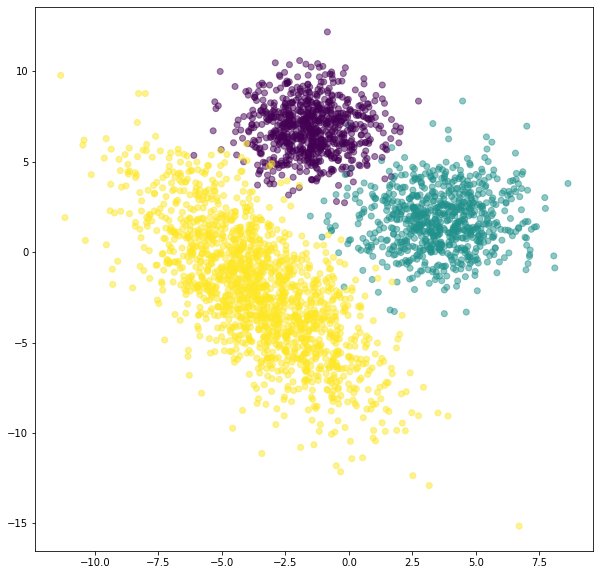

In [44]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [45]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Объект, который выполняет агломеративную кластеризацию датасета, инициализируется следующим образом:

In [46]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering()

В отличие от *k-means*, *AgglomerativeClustering* не имеет <b><span style="color:green">параметра random_state</span></b>.

>Полный список параметров доступен в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) (англ.).

Обучение модели *AgglomerativeClustering* проходит аналогично обучению модели *k-means*:

In [47]:
ac.fit(X)

AgglomerativeClustering()

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [48]:
ac.labels_

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

### ЗАДАЧИ

Обучите модель AgglomerativeClustering с параметром <code>n_clusters=3</code> на признаках исходного датасета. Напишите число листьев в иерархическом дереве, полученном при обучении:

In [49]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
ac.n_leaves_

3000

Подсчитайте количество элементов в каждом из получившихся кластеров.

In [50]:
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1112 1142 746 

При создании модели AgglomerativeClustering можно указать *матрицу смежности*, передав её в параметр connectivity. Построить матрицу смежности можно с помощью следующего кода:

In [51]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=6, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

В переменной connectivity будет хранится матрица смежности для ненаправленного графа на основе датасета.

Обучите *модель AgglomerativeClustering* с параметром <code>n_clusters=3</code> и составленной матрицей смежности на признаках исходного датасета. Подсчитайте количество элементов в каждом из получившихся кластеров.

In [52]:
ac = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac.fit(X)
_, counts = np.unique(ac.labels_, return_counts=True)
for count in counts:
    print(count, end=' ')

1486 746 768 

Постройте **дендрограмму** с помощью пакета scipy:

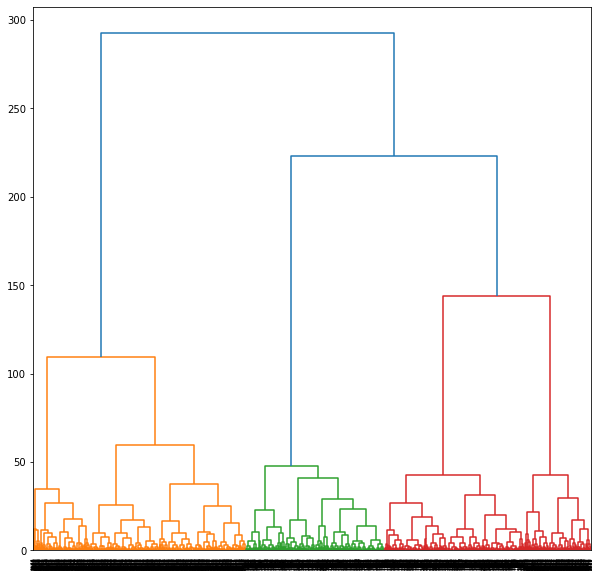

In [53]:
from scipy.cluster.hierarchy import dendrogram, linkage

# подготовим данные для построения дендрограммы
# ещё один способ выполнить агломеративную кластеризацию
Z = linkage(X, "ward")

# строим дендрограмму
dendrogram(Z, leaf_rotation=90.);

На выходе должно получиться изображение иерархического дерева.

Постройте дендрограмму на исходном наборе данных. Сколько получится кластеров, если граничным расстоянием для разделения кластеров взять 150.

In [54]:
3

3

Рассмотрим [данные](https://lms.skillfactory.ru/assets/courseware/v1/674de4a149becd117e895dc5bf1e36f4/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/food.txt), содержащие информацию о составе различных продуктов.

In [55]:
food = pd.read_csv('food.csv', sep=' ')
X = scaler.fit_transform(food.drop(['Name'], axis=1))

Попробуем построить на них иерархическую кластеризацию:

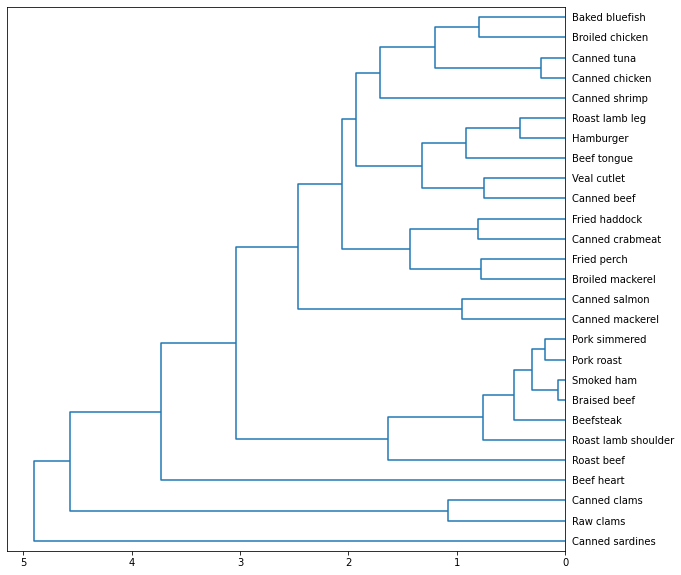

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X, method='average', metric='euclidean')
names = food['Name'].values
dend = dendrogram(Z, color_threshold=0, labels=names, 
                  orientation='left')

In [57]:
from scipy.cluster.hierarchy import fcluster

t = 2.3
labels = fcluster(Z, t, criterion='distance')

Сколько всего кластеров получилось для продуктов?

In [58]:
len(set(labels))

6

Введите номер кластера, в который попали продукты с содержанием кальция от 150 до 160.

In [59]:
food['labels'] = labels

In [60]:
food.columns

Index(['Name', 'Energy', 'Protein', 'Fat', 'Calcium', 'Iron', 'labels'], dtype='object')

In [61]:
food[(food['Calcium'] > 150)&(food['Calcium'] < 160)]['labels']

21    3
23    3
Name: labels, dtype: int32

Введите номер кластера, в который попал продукт с максимальной жирностью.

In [62]:
food[food['Fat'] == food['Fat'].max()]['labels']

2    2
Name: labels, dtype: int32

[К содержанию](#0)

---

# DBSCAN. Практика<a name="8"></a>

Интерактивная визуализация работы DBSCAN – https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

Для примера из видео: **Pimpled Smiley**

![DBSCAN](https://media0.giphy.com/media/lCL2GQewp7fkk/giphy.gif "DBSCAN")

Документация: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

Из набора данных случайным образом выбираем точку и смотрим её <b><span style="color:green">окрестности</span></b>. Если там не менее четырёх точек, то мы помечаем скопление кластером и далее для каждой точки из окрестности рассматриваем такое же окружение. Повторяем до момента окончания точек в наборе.

Посмотрим, как реализуется алгоритм <b><span style="color:green">DBSCAN</span></b> в пакете <b><span style="color:green">Sklearn</span></b>. При <b><span style="color:green">инициализации</span></b> можно задать размер окрестностей eps и минимальное число точек в этой окрестности <b><span style="color:green">min_sample</span></b>:

In [63]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5,
                min_samples=5)

Посмотрим, как *DBSCAN* будет работать с нашими наборами данных. Мы будем варьировать только <b><span style="color:green">размер окрестностей</span></b>:

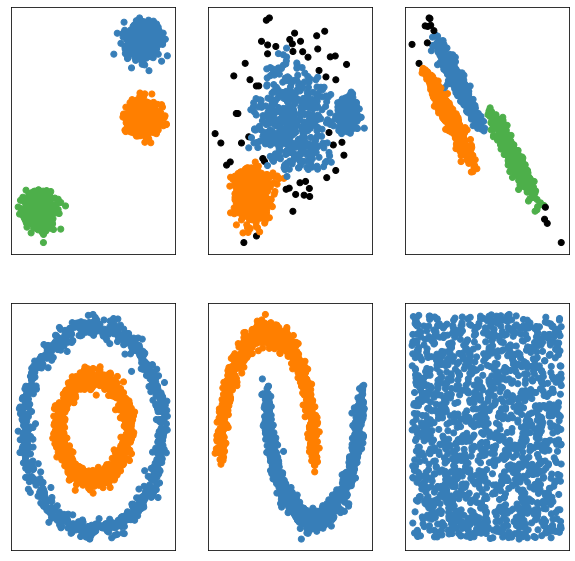

In [64]:
datasets_params_list = [
    (blobs, {'eps': 0.3}),
    (varied, {'eps': 0.18}),
    (aniso, {'eps': 0.184}),
    (noisy_circles, {'eps': 0.3}),
    (noisy_moons, {'eps': 0.3}),
    (no_structure, {'eps': 0.3})]

for i, (X, dbscan_params) in enumerate(datasets_params_list, start=1):
    X = StandardScaler().fit_transform(X)
    dbscan = DBSCAN(eps=dbscan_params['eps'])
    
    dbscan.fit(X)
    y_pred = dbscan.labels_.astype(np.int)

    plt.subplot(f'23{i}')
    plt.xticks([]); plt.yticks([])
    colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                         '#f781bf', '#a65628', '#984ea3',
                                         '#999999', '#e41a1c', '#dede00']),
                                  int(max(y_pred) + 1))))
    # чёрным цветом отметим выбросы
    colors = np.append(colors, ["#000000"])
    plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

В алгоритме мы сначала нормализуем данные, затем создаём объект *DBSCAN*, обучаем его при помощи <b><span style="color:green">метода .fit()</span></b> и получаем предсказания. Выбросы будем отмечать чёрным цветом.

В результате при хорошо разделимых кластерах *DBSCAN* справляется отлично, он определил <b><span style="color:green">сложные случаи</span></b> и ленточную структуру, правда, нашёл <b><span style="color:green">лишние выбросы</span></b>. Это единственный алгоритм, по сравнению с предыдущими, который определил, что кластерной структуры в последнем датасете нет. Добавление <b><span style="color:green">шума</span></b> смущает алгоритм: в одном из примеров кластеры склеились между собой.

### ПОДГОТОВКА ДАТАСЕТА

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

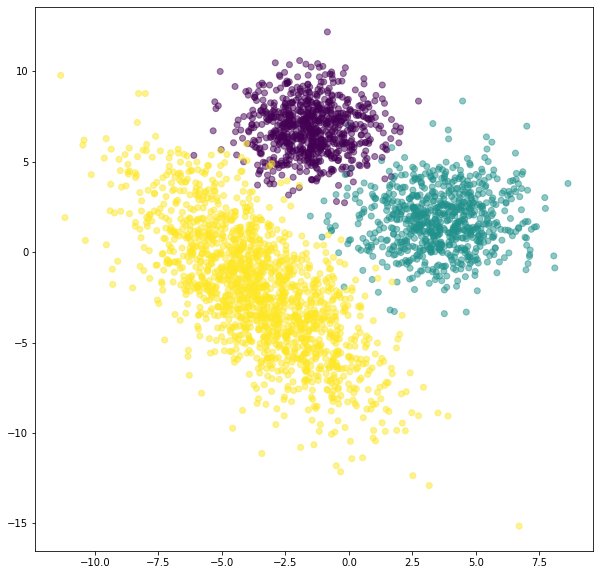

In [66]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [67]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 750, 1: 750, 2: 1500}

Объект, который выполняет кластеризацию датасета с помощью алгоритма DBSCAN, инициализируется так:

In [68]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

В отличие от *k-means* и *AgglomerativeClustering*, класс *DBSCAN* не имеет параметра <b><span style="color:green">n_clusters</span></b>, поскольку *DBSCAN* автоматически определяет число кластеров в выборке.

Полный список параметров доступен в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) (англ.).

Обучение модели *DBSCAN* проходит аналогично обучению модели *k-means*:

In [69]:
dbscan.fit(X)

DBSCAN()

Обучив, мы можем узнать, в какой кластер попал каждый из объектов:

In [70]:
dbscan.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

### ЗАДАЧИ

Обучите модель DBSCAN с параметрами eps=0.9 и min_samples=35 на признаках объектов исходного датасета. Выведите число получившихся кластеров.

Обратите внимание, что DBSCAN определяет выбросы, относя их к кластеру -1. Кластер выбросов учитывать в ответе не нужно.

In [71]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
len(set(abs(dbscan.labels_)))

3

Сколько объектов выборки было отмечено как выбросы в прошлой задаче?

In [72]:
unique, counts = np.unique(dbscan.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 368, 0: 656, 1: 721, 2: 1255}

Проверьте, как настройка параметров влияет на результат работы DBSCAN. Обучите модель DBSCAN с параметрами eps=0.8 и min_samples=35 на признаках объектов исходного датасета.

Выведите число объектов выборки, которые были отмечены как выбросы.

In [73]:
dbscan = DBSCAN(eps=0.8, min_samples=35)
dbscan.fit(X)
unique, counts = np.unique(dbscan.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 583, 0: 603, 1: 681, 2: 1133}

[К содержанию](#0)

---

# Сравнение алгоритмов<a name="9"></a>

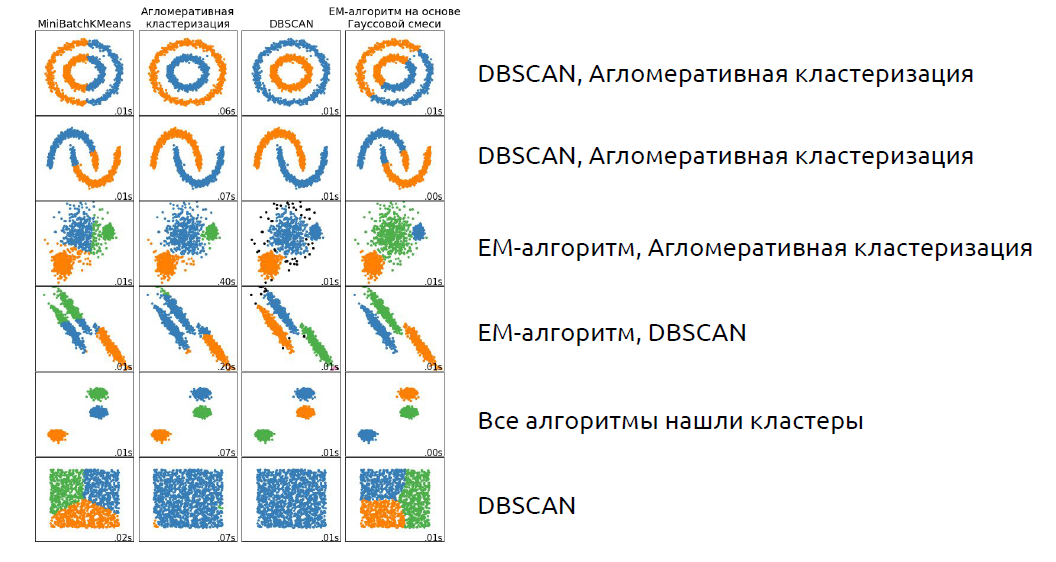

Сравним алгоритмы по параметрам, которые необходимо задать изначально, возможности для масштабирования алгоритма, сценарию использования (когда лучше всего пользоваться этим алгоритмом) и используемой метрике расстояния.

| <span style="color:green">Метод</span> | <span style="color:green">Параметры</span> | <span style="color:green">Масштабируемость</span> | <span style="color:green">Сценарий использования</span> | <span style="color:green">Расстояние</span> |
| :----------- | :----------- | :----------- | :----------- | :----------- |
| K-Means | Число кластеров | Очень много объектов, среднее число кластеров | Выпуклые, соизмеримые кластеры | Евклидово |
| EM-алгоритм на основе Gaussian Mixture | Веса, векторы средних, матрицы ковариаций | — | Восстановление плотности, выпуклые кластеры | Обобщение Евклидова расстояния |
| Агломеративная кластеризация | Число кластеров, связываемость, метрика | Много объектов, много кластеров | Много кластеров, нужно задавать функцию расстояния | Любое для Евклидова — Уорд |
| DBSCAN | Радиус окружности,число соседей | Много объектов, среднее число кластеров | Неравные, невыпуклые кластеры, выбросы | Евклидово |

[К содержанию](#0)

---

# Оценка качества<a name="10"></a>

Рассмотрим методы, с помощью которых можно оценить качество кластеризации. Обычно выделяют две большие группы методов:

* Внешние — те, которые основаны на сравнении результата кластеризации с априори известным разделением на классы.
* Внутренние — те, которые отображают качество кластеризации только по информации в данных.

### <span style="color:green">ФУНКЦИОНАЛЫ КАЧЕСТВА

Существует очень много различных функционалов качества для кластеризации, но не существует наилучшего или оптимального. Каждый метод кластеризации можно рассматривать как алгоритм поиска оптимального значения некоторого функционала.

#### <span style="color:green">Среднее внутрикластерное расстояние:

$F_0=\frac{\sum [y_i=y_j]\rho (x_i,x_j)}{\sum [y_i=y_j]}$ — значение данного функционала должно быть как можно меньше, чтобы объекты располагались как можно ближе друг к другу внутри кластера.

#### <span style="color:green">Среднее межкластерное расстояние:

$F_1=\frac{\sum [y_i\neq y_j]\rho (x_i,x_j)}{\sum [y_i\neq y_j]}$ — значение этого функционала должно быть как можно больше, чтобы объекты из разных кластеров находились друг от друга как можно дальше.

<b><span style="color:green">Отношение</span></b> этих двух расстояний:

$\frac{F_0}{F_1}\rightarrow min$ —  мы можем учитывать оба функционала, рассмотренные ранее( расстояние внутри кластера и между кластерами), и оптимизировать его. Естественно, нам нужно, чтобы оно было минимально (это будет достигаться, если расстояние между кластерами максимально, а внутри кластера — минимально).

#### <span style="color:green">Среднее расстояние до центра:

$\phi_0=\sum_{y\in Y}\frac{1}{|K_y|}\sum_{i:y_i=y}\rho^{2}(x_i,\mu_y)$ — должно быть как можно меньше, чтобы объекты располагались максимально близко к центру кластера.

#### <span style="color:green">Среднее внутрикластерное расстояние:

$\phi_1=\sum_{y_i=y}\rho^{2}(\mu_i,\mu)$ — должно быть максимальным, так как кластеры должны находиться друг от друга на как можно большем расстоянии.

<b><span style="color:green">Отношение</span></b> этих двух расстояний:

$\frac{\phi_0}{\phi_1}\rightarrow min$

### <span style="color:green">КОЭФФИЦИЕНТ СИЛУЭТА

Значение силуэта показывает, насколько объект похож на свой кластер по сравнению с другими кластерами.

$a$ — среднее расстояние от данного объекта до объектов из того же кластера.
$b$ — среднее расстояние от данного объекта до объектов из ближайшего кластера.

$$S=\frac{b-a}{max(a,b)}$$

Значение коэффициента находится в диапазоне от -1 до +1, где высокое значение указывает, что объект хорошо согласуется с кластером, которому он принадлежит, и плохо согласуется с «чужими» кластерами. Если у подавляющего большинства объектов этот коэффициент высокий, то можно считать кластеризацию достаточно качественной. Если же у большого числа объектов низкий или отрицательный коэффициент силуэта, то, возможно, кластеров слишком много, слишком мало или просто данные плохо поддаются разделению на кластеры.

> <b><span style="color:green">Проверка наличия кластерной структуры</span></b>
>
>1. Генерируем $p$ случайных точек из равномерного распределения.
>2. Генерируем $p$ случайных точек из обучающей выборки.
>3. Вычисляем величину:
>$$\begin{equation}H_{i n d}=\frac{\sum_{n} w_{i}}{\sum_{n} q_{i}+\sum_{n} w_{i}}\end{equation}$$

Эта статистика является одним из <b><span style="color:green">индикаторов тенденции к группированию</span></b>. Для её расчета создается $B$ псевдо-наборов данных, сгенерированных случайным образом на основе распределения с тем же стандартным отклонением, что и оригинальный набор данных. Для каждого наблюдения $i$ из $n$ рассчитывается среднее расстояние до $k$ ближайших соседей: $w$ между реальными объектами и $q$ между искусственными объектами и их ближайшими реальными соседями. Если статистика превышает значение $0.5$, то мы оставляем нулевую гипотезу, которая заключается в том, что $q$ и $w$ подобны и группируемые объекты распределены однородно и случайно

В случае, если статистика меньше чем 0.25, можно с 90% уверенностью отвергнуть нулевую гипотезу в пользу альтеративной, которая говорит о наличии тенденции к группировке данных.

### <span style="color:green">ВНЕШНИЕ МЕТРИКИ

Если исходные данные размечены, то мы можем использовать метки объектов для измерения <b><span style="color:green">качества кластеризации</span></b>.

<b><span style="color:green">Однородность</span></b> — кластер состоит только из объектов одного класса:

$$h=1-\frac{H(C|K)}{H(C)}$$

В данной формуле $H(C|K)$ — энтропия класса при условии кластера, а $H(C)$ — энтропия класса

То есть, максимальное значение однородность достигает в том случае, если в кластере объекты одного класса.

<b><span style="color:green">Полнота</span></b> — достигает максимальное значение в том случае, когда все объекты из класса принадлежат одному кластеру:

$$c=1-\frac{H(K|C)}{H(K)}$$

В данной формуле $H(K|C)$ — энтропия кластера при условии класса, а  $H(K)$ — энтропия кластера

<b><span style="color:green">V-мера</span></b> — среднее гармоническое однородности и полноты, то есть метрика,  объединяющая эти два показателя:

$$u=2\frac{hc}{h+c}$$

[К содержанию](#0)

---

# Коэффициент силуэта. Практика<a name="11"></a>

Датасет

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

<b><span style="color:green">Коэффициент силуэта</span></b> можно посчитать при помощи реализации из библиотеки <b><span style="color:green">sklearn</span></b>:

In [75]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем коэффициент силуэта
silhouette_score(X=X, labels=kmeans_pred, metric='euclidean')

0.5131660482634046

В качестве параметров в <b><span style="color:green">функции silhouette_score</span></b> используются:

* <b><span style="color:green">X</span></b> — массив признаков объектов выборки или массив попарных расстояний между объектами;
* <b><span style="color:green">Y</span></b> — массив предсказанных кластеров для объектов выборки;
* <b><span style="color:green">metric</span></b> — метрика, используемая для вычисления расстояния между объектами, мы будем использовать <b><span style="color:green">euclidean</span></b> (Евклидово расстояние), полный список названий метрик можно увидеть <b><span style="color:green">[здесь](https://scikit-learn.org/0.19/modules/generated/sklearn.metrics.pairwise.pairwise_distances.html)</span></b>.

>Полное описание функции можно прочитать в <b><span style="color:green">[документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)</span></b> (англ.).

### ЗАДАЧИ

Обучите **модель GaussianMixture** с параметрами <code>n_components=3</code> и <code>random_state=42</code> на признаках исходного датасета. Посчитайте коэффициент силуэта для получившейся кластеризации. Ответ округлите до десятых и запишите с точкой.

In [76]:
gm = GaussianMixture(n_components=3, random_state=2)
gm.fit(X)
y_pred = gm.predict(X)

In [77]:
round(silhouette_score(X=X, labels=y_pred, metric='euclidean'), 1)

0.5

Сравните результаты кластеризации четырёх рассмотренных алгоритмов на исходном датасете при помощи коэффициента силуэта, инициализируйте алгоритмы со следующими параметрами:

* K-means — n_clusters=3, random_state=42
* EM-алгоритм (GaussianMixture) — n_components=3, random_state=42
* Агломеративная кластеризация – n_clusters=3
* DBSCAN – eps=0.9, min_samples=35

Укажите максимальное значение коэффициента силуэта, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

In [78]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_
print('K-means =', 
      round(silhouette_score(X=X, labels=y_pred, metric='euclidean'), 2))

K-means = 0.51


In [79]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
print('EM-алгоритм =', 
      round(silhouette_score(X=X, labels=y_pred, metric='euclidean'), 2))

EM-алгоритм = 0.4


In [80]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_
print('Агломеративная кластеризация =', 
      round(silhouette_score(X=X, labels=y_pred, metric='euclidean'), 2))

Агломеративная кластеризация = 0.48


In [81]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_
print('DBSCAN', 
      round(silhouette_score(X=X, labels=y_pred, metric='euclidean'), 2))

DBSCAN 0.45


Подберите оптимальное количество кластеров с помощью **коэффициента силуэта**. Для этого найдите такое число кластеров, при котором значение коэффициента будет максимальным.

В трёх из рассмотренных нами алгоритмов необходимо задать число кластеров при инициализации: K-means, EM-алгоритм и агломеративная кластеризация.

Найдите значение коэффициента силуэта для данных алгоритмов при числе кластеров от 2 до 10 включительно. Для K-means и EM-алгоритма установите значение **random_state=42**.

В качестве ответа через пробел введите **число кластеров**, при котором значение коэффициента силуэта для результатов кластеризации было наибольшим для каждого из алгоритмов. Вводите в следующем порядке: K-means, EM-алгоритм, агломеративная кластеризация.

In [82]:
km_ss_max = 0
gm_ss_max = 0
ac_ss_max = 0
for i in range(2, 11):
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit(X)
    y_pred = k_means.labels_
    ss = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if ss > km_ss_max:
        km_bst_cnt_cl = i
        km_ss_max = ss
    gm = GaussianMixture(n_components=i, random_state=42)
    gm.fit(X)
    y_pred = gm.predict(X)
    ss = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if ss > gm_ss_max:
        gm_bst_cnt_cl = i
        gm_ss_max = ss
    ac = AgglomerativeClustering(n_clusters=i)
    ac.fit(X)
    y_pred = ac.labels_
    ss = silhouette_score(X=X, labels=y_pred, metric='euclidean')
    if ss > ac_ss_max:
        ac_bst_cnt_cl = i
        ac_ss_max = ss

print(km_bst_cnt_cl, gm_bst_cnt_cl, ac_bst_cnt_cl)

3 4 4


[К содержанию](#0)

---

# Однородность. Практика<a name="12"></a>

<b><span style="color:green">Однородность</span></b> можно посчитать при помощи реализации из библиотеки <b><span style="color:green">sklearn</span></b>:

In [83]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score
from sklearn.preprocessing import StandardScaler


# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
X = StandardScaler().fit_transform(X)
kmeans.fit(X)
kmeans_pred = kmeans.labels_ 
# теперь посчитаем однородность
homogeneity_score(labels_true=y, labels_pred=kmeans_pred)

0.804474693112785

>Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html) (англ.).

### ЗАДАЧИ

Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

* k-means — <code>n_clusters=3</code>, <code>random_state=42</code>
* GaussianMixture — <code>n_components=3</code>, <code>random_state=42</code>
* AgglomerativeClustering — <code>n_clusters=3</code>
* DBSCAN — <code>eps=0.9</code>, <code>min_samples=35</code>  


В качестве ответа укажите **максимальное значение однородности**, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

При решении задания модуля стандартизация должна быть включена.

In [84]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_
print('K-means =', 
      round(homogeneity_score(labels_true=y, labels_pred=y_pred), 2))

K-means = 0.8


In [85]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
print('EM-алгоритм =', 
      round(homogeneity_score(labels_true=y, labels_pred=y_pred), 2))

EM-алгоритм = 0.93


In [86]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_
print('Агломеративная кластеризация =', 
      round(homogeneity_score(labels_true=y, labels_pred=y_pred), 2))

Агломеративная кластеризация = 0.91


In [87]:
dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_
print('DBSCAN', 
      round(homogeneity_score(labels_true=y, labels_pred=y_pred), 2))

DBSCAN 0.0


[К содержанию](#0)

---

# Полнота. Практика<a name="13"></a>

<b><span style="color:green">Полноту</span></b> можно посчитать при помощи реализации из библиотеки <b><span style="color:green">sklearn</span></b>:

In [88]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import completeness_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
completeness_score(labels_true=y, labels_pred=kmeans_pred)

0.7828224102025245

>Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html) (англ.).

### ЗАДАЧИ

Обучите **модель GaussianMixture** с параметрами <code>n_components=3</code> и <code>random_state=42</code> на признаках исходного датасета. Посчитайте **полноту** для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [89]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
print('EM-алгоритм =', 
      round(completeness_score(labels_true=y, labels_pred=y_pred), 2))

EM-алгоритм = 0.93


Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

* k-means — <code>n_clusters=3</code>, <code>random_state=42</code>
* GaussianMixture — <code>n_components=3</code>, <code>random_state=42</code>
* AgglomerativeClustering — <code>n_clusters=3</code>
* DBSCAN — <code>eps=0.9</code>, <code>min_samples=35</code>  


В качестве ответа укажите **максимальное значение полноты**, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

При решении задания модуля стандартизация должна быть включена.

In [90]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_
print('K-means =', 
      round(completeness_score(labels_true=y, labels_pred=y_pred), 2))

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
print('EM-алгоритм =', 
      round(completeness_score(labels_true=y, labels_pred=y_pred), 2))

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_
print('Агломеративная кластеризация =', 
      round(completeness_score(labels_true=y, labels_pred=y_pred), 2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_
print('DBSCAN', 
      round(completeness_score(labels_true=y, labels_pred=y_pred), 2))

K-means = 0.78
EM-алгоритм = 0.93
Агломеративная кластеризация = 0.91
DBSCAN 0.08


[К содержанию](#0)

---

# V-мера. Практика<a name="14"></a>

<b><span style="color:green">V-меру</span></b> можно посчитать при помощи реализации из библиотеки <b><span style="color:green">sklearn</span></b>:

In [91]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import v_measure_score

# сначала получим предсказанные кластеры при помощи метода кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_pred = kmeans.labels_

# теперь посчитаем полноту
v_measure_score(labels_true=y, labels_pred=kmeans_pred)

0.793500872513578

>Полное описание функции можно прочитать в [документации](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html) (англ.).

### ЗАДАЧИ

Обучите **модель GaussianMixture** с параметрами <code>n_components=3</code> и <code>random_state=42</code> на признаках исходного датасета. Посчитайте **v-меру** для получившейся кластеризации.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [92]:
gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
print('EM-алгоритм =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

EM-алгоритм = 0.93


Сравните результаты кластеризации алгоритмов k-means, GaussianMixture, AgglomerativeClustering и DBSCAN на исходном датасете при помощи однородности, инициализируйте алгоритмы со следующими параметрами:

* k-means — <code>n_clusters=3</code>, <code>random_state=42</code>
* GaussianMixture — <code>n_components=3</code>, <code>random_state=42</code>
* AgglomerativeClustering — <code>n_clusters=3</code>
* DBSCAN — <code>eps=0.9</code>, <code>min_samples=35</code>  


В качестве ответа укажите **максимальное значение v-меры**, полученное при помощи данных моделей. Ответ округлите до сотых и запишите с точкой.

При решении задания модуля стандартизация должна быть включена.

In [93]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_
print('K-means =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

gm = GaussianMixture(n_components=3, random_state=42)
gm.fit(X)
y_pred = gm.predict(X)
print('EM-алгоритм =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_
print('Агломеративная кластеризация =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

dbscan = DBSCAN(eps=0.9, min_samples=35)
dbscan.fit(X)
y_pred = dbscan.labels_
print('DBSCAN', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

K-means = 0.79
EM-алгоритм = 0.93
Агломеративная кластеризация = 0.91
DBSCAN 0.0


Сравним модификации K-means с использованием случайной инициализации **центроид** и с использованием алгоритма **K-means++** для инициализации центроид.

Для этого обучим на исходном датасете 2 модели k-means со следующими параметрами:

* <code>n_clusters=3, init='k-means++', n_init=1, random_state=42</code>
* <code>n_clusters=3, init='random', n_init=1, random_state=42</code>  

В качестве ответа укажите **максимальное значение v-меры**, полученное при помощи данных моделей.

Подсказка: При решении задания модуля стандартизация должна быть включена. Ответ округлите до сотых и запишите с точкой.

In [94]:
k_means = KMeans(n_clusters=3, init='k-means++', n_init=1, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_
print('K-means++ =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

k_means = KMeans(n_clusters=3, init='random', n_init=1, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_
print('Random K-means =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

K-means++ = 0.79
Random K-means = 0.79


Теперь сравним k-means с ещё одной модификацией — K-means mini batch. Воспользоваться реализацией K-means mini batch в библиотеке *sklearn* можно следующим образом:

In [95]:
from sklearn.cluster import MiniBatchKMeans

kmeans_mini_batch = MiniBatchKMeans(n_clusters=
3, random_state=
42)
kmeans_mini_batch.fit(X)
kmeans_mini_batch_pred = kmeans_mini_batch.labels_

Механизм кластеризации версии K-means mini batch схож с оригинальной версией алгоритма. Обучите на исходном датасете две модели:

* _k-means_ с параметрами <code>n_clusters=3, n_init=1, random_state=42</code>
* _MiniBatchKMeans_ с параметрами <code>n_clusters=3, n_init=1, random_state=42</code>  

В качестве ответа введите **максимальное значение v-меры**, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [96]:
k_means = KMeans(n_clusters=3, n_init=1, random_state=42)
k_means.fit(X)
y_pred = k_means.labels_
print('K-means =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 1))

kmeans_mini_batch = MiniBatchKMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_mini_batch.fit(X)
y_pred = kmeans_mini_batch.labels_
print('MiniBatch =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 1))

K-means = 0.8
MiniBatch = 0.7


Рассмотрим агломеративную кластеризацию. Сравним, как влияет на качество кластеризации разный тип расстояния между кластерами.

Обучите на исходном датасете четыре **модели AgglomerativeClustering** с параметром <code>n_clusters=3</code>, меняя параметр <code>linkage</code>.

В качестве ответа укажите **максимальное значение v-меры**, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до десятых и запишите с точкой.

In [99]:
linkage_lst = ['ward', 'complete', 'average', 'single']
for link in linkage_lst:
    ac = AgglomerativeClustering(n_clusters=3, linkage=link)
    ac.fit(X)
    y_pred = ac.labels_
    print(link, '=', 
          round(v_measure_score(labels_true=y, labels_pred=y_pred), 1))

ward = 0.9
complete = 0.6
average = 0.7
single = 0.0


Сравним, как влияет предварительный расчёт матрицы смежности на качество агломеративной кластеризации.

Обучите на исходном датасете две **модели AgglomerativeClustering**:

* с параметром <code>n_clusters=3</code>
* с параметром <code>n_clusters=3</code> и предварительно посчитанной матрицей смежности для объектов датасета

Построить матрицу смежности можно с помощью кода:

In [100]:
from sklearn.neighbors import kneighbors_graph

connectivity = kneighbors_graph(X, n_neighbors=
6, include_self=
False)
connectivity = 0.5 * (connectivity + connectivity.T)

В качестве ответа введите **максимальное значение v-меры**, полученное при помощи данных моделей. В задании может понадобиться, а может не понадобиться нормализация и это нужно проверить во время решения задания. Ответ округлите до сотых и запишите с точкой.

In [101]:
ac = AgglomerativeClustering(n_clusters=3)
ac.fit(X)
y_pred = ac.labels_
print('AgglomerativeClustering =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 1))

ac_con = AgglomerativeClustering(n_clusters=3, connectivity=connectivity)
ac_con.fit(X)
y_pred = ac_con.labels_
print('AgglomerativeClusteringConnectivity =', 
      round(v_measure_score(labels_true=y, labels_pred=y_pred), 2))

AgglomerativeClustering = 0.9
AgglomerativeClusteringConnectivity = 0.88


### <span style="color:green">ВНЕШНИЕ МЕТРИКИ

<b><span style="color:green">X</span></b>

<code>x</code>

[К содержанию](#0)

---

# Оценка качества<a name="15"></a>

### <span style="color:green">ВНЕШНИЕ МЕТРИКИ

<b><span style="color:green">X</span></b>

<code>x</code>

[К содержанию](#0)